In [1]:
import pandas as pd
import pymatgen as mp
import matplotlib.pyplot as plt
%matplotlib inline

from matminer.featurizers.structure import JarvisCFID
import numpy as np
import seaborn as sns

import pymatgen.io.cif as mpcif
from os.path import join
from molmass import Formula
import re

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

/home/andres/.local/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [39]:
def import_dataset(nombre):
    """
    función para importar datasets del materials project o features jarvis
    """
    path = "./datasets/"
    
    if nombre == "MP_db":
    
        mp_files = [pd.read_csv(path + f"mp{s}.csv.bz2") for s in range(1,4)]
        dataset = pd.concat(mp_files, ignore_index=True)
        
    elif nombre == 'MP_filter':
        dataset = pd.read_csv(path + "mp_filter.csv.bz2")
    elif nombre == "jarvis":

        jarvis_files = [pd.read_csv(path + f"jarvis{s}.csv.bz2") for s in range(11)]
        dataset = pd.concat(jarvis_files, ignore_index=True)

        jarviscfid = JarvisCFID()
        names = jarviscfid.feature_labels()
        dataset = dataset.drop(dataset.columns[-1], axis = 1)
        dataset.columns = ['Formula'] + names

    return dataset       

In [41]:
def load_target(target):
    target = pd.read_csv(f'./target/{target}.csv')
    return target

In [3]:
MP_db = import_dataset(nombre='MP_db')
MP_db.head()

energy  energy_per_atom      volume  formation_energy_per_atom  nsites  \
0  -0.856633        -0.856633  114.051805                   0.038770       1   
1  -4.532045        -4.532045   20.514816                   0.126463       1   
2  -9.777856        -9.777856   22.211548                   0.179329       1   
3  -8.646946        -4.323473   89.091084                  -1.792337       2   
4 -54.270932        -9.045155  117.083323                  -1.249369       6   

  pretty_formula  is_hubbard      elements  nelements  e_above_hull  ...  \
0             Cs       False        ['Cs']          1      0.038770  ...   
1             As       False        ['As']          1      0.126463  ...   
2             Hf       False        ['Hf']          1      0.179329  ...   
3           BaTe       False  ['Ba', 'Te']          2      0.000000  ...   
4           Hf2S       False   ['Hf', 'S']          2      0.000000  ...   

   elasticity.nsites elasticity  \
0                1.0        NaN   
1                1.0        NaN   
2                NaN        NaN   
3                2.0        NaN   
4                6.0        NaN   

                                   diel.e_electronic  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  [[5.976097773676089, -1.8724788982724187e-07, ...   
4                                                NaN   

                                        diel.e_total    diel.n  \
0                                                NaN       NaN   
1                                                NaN       NaN   
2                                                NaN       NaN   
3  [[13.189482638520346, -4.132634511874878e-07, ...  2.444606   
4                                                NaN       NaN   

  diel.poly_electronic diel.poly_total  piezo.eij_max  \
0                  NaN             NaN            NaN   
1                  NaN             NaN            NaN   
2                  NaN             NaN            NaN   
3             5.976097       13.189482            NaN   
4                  NaN             NaN            NaN   

  piezo.piezoelectric_tensor piezo.v_max  
0                        NaN         NaN  
1                        NaN         NaN  
2                        NaN         NaN  
3                        NaN         NaN  
4                        NaN         NaN  

[5 rows x 58 columns]

In [53]:
energy = load_target('elasticity.K_Voigt_Reuss_Hill')
jarvis[~energy.iloc[:,-1].isnull()]

Formula  jml_bp_mult_atom_rad  jml_hfus_add_bp  \
0           BaTe           3186.425000      1702.122500   
1           Hf2S           4137.835000      2797.079605   
3           GaTe           2492.750000      1869.114825   
5      Al(CoSi)2           3766.766667      3055.257067   
6        Sc2ZnS4           2425.223333      1667.032963   
...          ...                   ...              ...   
41949   Ca2Sn3O8           2461.823333      1574.119700   
41950        WO3           3960.960000      2959.362650   
41972       SbF5           1369.757500       972.615225   
41978      Ta2O5           4182.035000      2910.783950   
41981        WO3           3960.960000      2959.362650   

       jml_elec_aff_mult_voro_coord  jml_mol_vol_subs_atom_mass  \
0                          5.452500                 -103.153500   
1                          4.000000                  -90.792500   
3                          5.477500                  -82.531500   
5                          6.474667                  -28.423411   
6                          3.330333                  -34.246637   
...                             ...                         ...   
41949                      3.293133                  -38.312467   
41950                      6.045000                  -86.504700   
41972                      8.320000                  -55.684202   
41978                      3.665000                  -84.368640   
41981                      6.045000                  -86.504700   

       jml_is_halogen  jml_atom_mass_subs_first_ion_en   jml_row  \
0                 0.0                       125.352868  5.500000   
1                 0.0                        96.684960  4.500000   
3                 0.0                        91.157049  4.500000   
5                 0.0                        30.660592  3.333333   
6                 0.0                        38.704738  3.666667   
...               ...                              ...       ...   
41949             0.0                        49.237423  3.666667   
41950             0.0                        89.178660  4.000000   
41972             0.5                        57.363607  3.500000   
41978             0.0                        87.889830  4.000000   
41981             0.0                        89.178660  4.000000   

       jml_mol_vol_mult_atom_mass  jml_voro_coord_divi_therm_cond  ...  \
0                     3925.547160                        1.111111  ...   
1                     1448.437525                       10.016967  ...   
3                     1716.713700                        0.919540  ...   
5                      333.870309                        0.068132  ...   
6                      590.484857                        6.761009  ...   
...                           ...                             ...  ...   
41949                 1087.193028                       37.667148  ...   
41950                 1009.357192                       56.462820  ...   
41972                 1213.798258                       63.281062  ...   
41978                 1120.517041                       56.521128  ...   
41981                 1009.357192                       56.462820  ...   

       jml_nn_91  jml_nn_92  jml_nn_93  jml_nn_94  jml_nn_95  jml_nn_96  \
0       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1       0.000000   8.000000   8.000000   0.000000   8.000000   0.000000   
3       6.000000   0.000000   3.000000   6.000000   0.000000   9.000000   
5      10.800000  18.000000   5.600000   0.000000   0.000000   6.000000   
6       1.714286   0.000000   1.714286   4.000000  13.714286   3.428571   
...          ...        ...        ...        ...        ...        ...   
41949   5.384615   9.076923   9.538462   9.692308   6.615385   6.153846   
41950   5.500000   5.000000   9.000000   9.000000  10.500000  13.000000   
41972  11.333333   5.333333   4.000000   4.666667   5.166667   5.166667   
41978   7.428571   7.714286   4.857143 

In [16]:
MP_filter = import_dataset(nombre='MP_filter')
MP_filter.shape

(42003, 58)

In [35]:
elasticity = ['elasticity.G_Reuss',
       'elasticity.G_VRH', 'elasticity.G_Voigt',
       'elasticity.G_Voigt_Reuss_Hill', 'elasticity.K_Reuss',
       'elasticity.K_VRH', 'elasticity.K_Voigt',
       'elasticity.K_Voigt_Reuss_Hill', 'elasticity.elastic_anisotropy']

In [36]:
for elast in elasticity:
    MP_filter[['material_id', 'pretty_formula', elast]].to_csv(f'{elast}.csv', index=False)

In [40]:
jarvis = import_dataset(nombre='jarvis')
jarvis

Formula  jml_bp_mult_atom_rad  jml_hfus_add_bp  \
0             BaTe           3186.425000      1702.122500   
1             Hf2S           4137.835000      2797.079605   
2             Mo3P           3836.200000      2731.280100   
3             GaTe           2492.750000      1869.114825   
4             BaN2           2328.867000      1110.217375   
...            ...                   ...              ...   
41998    CaPrTi2O6           3698.067500      2242.624500   
41999    Ca(MnS2)4           2382.690000      1603.033903   
42000  CaPr(MoO3)2           4232.667500      2580.682825   
42001    CaHoTi2O6           3359.617500      2100.136675   
42002    Ba2Mn2F11           2639.188333      1520.744283   

       jml_elec_aff_mult_voro_coord  jml_mol_vol_subs_atom_mass  \
0                          5.452500                 -103.153500   
1                          4.000000                  -90.792500   
2                          5.395000                  -50.256881   
3                          5.477500                  -82.531500   
4                          0.802500                  -49.816850   
...                             ...                         ...   
41998                      2.799600                  -42.463012   
41999                      2.761467                  -26.000348   
42000                      4.426100                  -54.796262   
42001                      2.674600                  -48.983680   
42002                      4.291667                  -51.517816   

       jml_is_halogen  jml_atom_mass_subs_first_ion_en   jml_row  \
0            0.000000                       125.352868  5.500000   
1            0.000000                        96.684960  4.500000   
2            0.000000                        54.667321  4.000000   
3            0.000000                        91.157049  4.500000   
4            0.000000                        65.793968  4.000000   
...               ...                              ...       ...   
41998        0.000000                        53.204930  4.500000   
41999        0.000000                        34.391285  3.666667   
42000        0.000000                        65.157102  4.750000   
42001        0.000000                        59.073473  4.500000   
42002        0.333333                        60.398321  4.000000   

       jml_mol_vol_mult_atom_mass  jml_voro_coord_divi_therm_cond  ...  \
0                     3925.547160                        1.111111  ...   
1                     1448.437525                       10.016967  ...   
2                      713.545315                       10.629192  ...   
3                     1716.713700                        0.919540  ...   
4                     2715.024519                       58.349787  ...   
...                           ...                             ...  ...   
41998                 1191.994296                       28.564746  ...   
41999                  650.602560                        6.889523  ...   
42000                 1289.647376                       28.480459  ...   
42001                 1231.973065                       28.505852  ...   
42002                 1952.325022                       42.668574  ...   

       jml_nn_91  jml_nn_92  jml_nn_93  jml_nn_94  jml_nn_95  jml_nn_96  \
0       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1       0.000000   8.000000   8.000000   0.000000   8.000000   0.000000   
2       4.000000   7.000000  11.500000   4.000000   3.000000   8.500000   
3       6.000000   0.000000   3.000000   6.000000   0.000000   9.000000   
4       5.333333   3.333333   6.666667   4.666667   6.000000   8.666667   
...          ...        ...        ...        ...        ...        ...   
41998   6.400000   7.600000   5.200000   9.600000   6.400000  12.800000   
41999   1.846154   0.000000   0.000000   4.307692   1.846154   6.461538   
42000   8.200000   3.200000   5.000000   6.800000   8.000000   7.400000   
42001  10.200000 

In [4]:
#función que me dice el nombre de las columnas del data set

def get_columns(dataset):
    columns = dataset.columns.tolist()
    columns_df = pd.DataFrame({'Columns': columns})
    return columns_df

In [5]:
get_columns(MP_db)

Columns
0                               energy
1                      energy_per_atom
2                               volume
3            formation_energy_per_atom
4                               nsites
5                       pretty_formula
6                           is_hubbard
7                             elements
8                            nelements
9                         e_above_hull
10                       is_compatible
11                            task_ids
12                            band_gap
13                             density
14                             icsd_id
15                            icsd_ids
16                                 cif
17                 total_magnetization
18                         material_id
19                          oxide_type
20                                tags
21                               piezo
22                                diel
23                        full_formula
24                unit_cell_formula.Cs
25                  spacegroup.symprec
26                   spacegroup.source
27                   spacegroup.symbol
28                   spacegroup.number
29              spacegroup.point_group
30           spacegroup.crystal_system
31                     spacegroup.hall
32                  elasticity.G_Reuss
33                    elasticity.G_VRH
34                  elasticity.G_Voigt
35       elasticity.G_Voigt_Reuss_Hill
36                  elasticity.K_Reuss
37                    elasticity.K_VRH
38                  elasticity.K_Voigt
39       elasticity.K_Voigt_Reuss_Hill
40       elasticity.elastic_anisotropy
41           elasticity.elastic_tensor
42      elasticity.homogeneous_poisson
43            elasticity.poisson_ratio
44     elasticity.universal_anisotropy
45  elasticity.elastic_tensor_original
46        elasticity.compliance_tensor
47                 elasticity.warnings
48                   elasticity.nsites
49                          elasticity
50                   diel.e_electronic
51                        diel.e_total
52                              diel.n
53                diel.poly_electronic
54                     diel.poly_total
55                       piezo.eij_max
56          piezo.piezoelectric_tensor
57                         piezo.v_max

In [6]:
#Gráfico de distribución de valores

def displot(dataset, column):
    ax = sns.displot(data=dataset, x=column)
    plt.show()

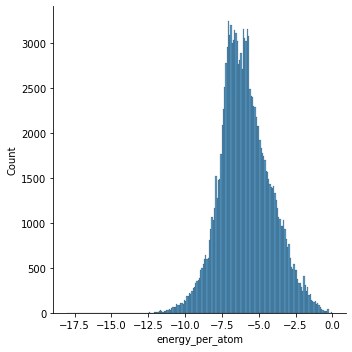

In [7]:
displot(MP_db, 'energy_per_atom')

In [27]:
#Gráfico de distribución de valores 2D

def displot2D(dataset, column1, column2, kind):
    ax = sns.displot(data=dataset, x=column1, y=column2, kind=kind)
    plt.show()

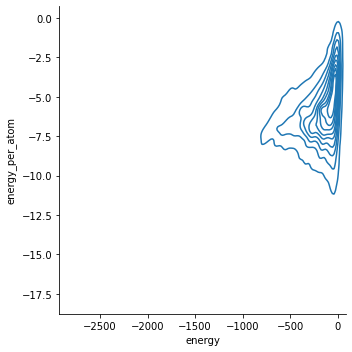

In [28]:
displot2D(MP_db, 'energy', 'energy_per_atom', 'kde')

In [21]:
def cluster_inertia(dataset, column1, column2):
    dataset = dataset[[column1, column2]]
    scores = [KMeans(n_clusters=i+2).fit(dataset).inertia_ for i in range(10)]
    plt.plot(np.arange(2, 12), scores)
    plt.xlabel('Number of clusters')
    plt.ylabel("Inertia")
    plt.title("Inertia of k-Means versus number of clusters")
    plt.show()

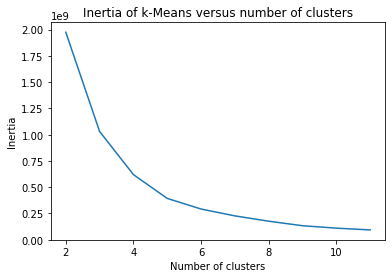

In [22]:
cluster_inertia(MP_db, 'energy', 'energy_per_atom')

In [25]:
def plot_clusters(dataset, column1, column2, n_clusters):
    dataset = dataset[[column1, column2]]
    labels = KMeans(n_clusters).fit(dataset).labels_
    ax = sns.scatterplot(data=dataset, x=column1, y=column2, hue=labels)
    plt.show()

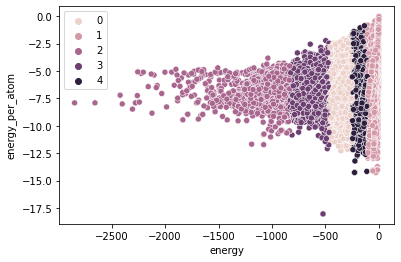

In [26]:
plot_clusters(MP_db, 'energy', 'energy_per_atom', 5)